In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set_style()


In [2]:
stroke_df = pd.read_csv(os.path.join('Resources/healthcare-dataset-stroke-data_nochild.csv'))
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4313 non-null   object 
 1   age                4313 non-null   int64  
 2   hypertension       4313 non-null   int64  
 3   heart_disease      4313 non-null   int64  
 4   ever_married       4313 non-null   object 
 5   work_type          4313 non-null   object 
 6   Residence_type     4313 non-null   object 
 7   avg_glucose_level  4313 non-null   float64
 8   bmi                4130 non-null   float64
 9   smoking_status     4313 non-null   object 
 10  stroke             4313 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 370.8+ KB


In [4]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
stroke_df[stroke_df['bmi'].isna() & stroke_df['stroke'] == 1]

# Replace the missing values with mean of bmi attribute
stroke_df['bmi'].fillna(np.round(stroke_df['bmi'].mean(), 1), inplace = True)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4308,Female,80,1,0,Yes,Private,Urban,83.75,30.4,never smoked,0
4309,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4310,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4311,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Create a new column for normalized age
stroke_df['age_norm']=(stroke_df['age']-stroke_df['age'].min())/(stroke_df['age'].max()-stroke_df['age'].min())

# Create a new column for normalized avg glucose level
stroke_df['avg_glucose_level_norm']=(stroke_df['avg_glucose_level']-stroke_df['avg_glucose_level'].min())/(stroke_df['avg_glucose_level'].max()-stroke_df['avg_glucose_level'].min())

# Create a new column for normalized bmi
stroke_df['bmi_norm']=(stroke_df['bmi']-stroke_df['bmi'].min())/(stroke_df['bmi'].max()-stroke_df['bmi'].min())

stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.769231,0.801265,0.293163
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1,0.676923,0.679023,0.221321
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.969231,0.234512,0.245655
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.492308,0.536008,0.267671
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.953846,0.549349,0.147161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,Female,80,1,0,Yes,Private,Urban,83.75,30.4,never smoked,0,0.969231,0.132167,0.221321
4309,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0.984615,0.323516,0.332561
4310,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0.276923,0.128658,0.223638
4311,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0.523077,0.513203,0.165701


In [6]:
stroke_binary= pd.get_dummies(stroke_df,columns=["gender","ever_married","Residence_type"])
stroke_binary.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67,0,1,Private,228.69,36.6,formerly smoked,1,0.769231,0.801265,0.293163,0,1,0,1,0,1
1,61,0,0,Self-employed,202.21,30.4,never smoked,1,0.676923,0.679023,0.221321,1,0,0,1,1,0
2,80,0,1,Private,105.92,32.5,never smoked,1,0.969231,0.234512,0.245655,0,1,0,1,1,0
3,49,0,0,Private,171.23,34.4,smokes,1,0.492308,0.536008,0.267671,1,0,0,1,0,1
4,79,1,0,Self-employed,174.12,24.0,never smoked,1,0.953846,0.549349,0.147161,1,0,0,1,1,0


In [7]:
stroke_binary = stroke_binary.replace({"smoking_status": {"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3}})
stroke_binary = stroke_binary.replace({"work_type": {"Private": 0, "Self-employed": 1, "Govt_job": 2,"Never_worked":3}})
stroke_binary

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67,0,1,0,228.69,36.6,0,1,0.769231,0.801265,0.293163,0,1,0,1,0,1
1,61,0,0,1,202.21,30.4,1,1,0.676923,0.679023,0.221321,1,0,0,1,1,0
2,80,0,1,0,105.92,32.5,1,1,0.969231,0.234512,0.245655,0,1,0,1,1,0
3,49,0,0,0,171.23,34.4,2,1,0.492308,0.536008,0.267671,1,0,0,1,0,1
4,79,1,0,1,174.12,24.0,1,1,0.953846,0.549349,0.147161,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,80,1,0,0,83.75,30.4,1,0,0.969231,0.132167,0.221321,1,0,0,1,0,1
4309,81,0,0,1,125.20,40.0,1,0,0.984615,0.323516,0.332561,1,0,0,1,0,1
4310,35,0,0,1,82.99,30.6,1,0,0.276923,0.128658,0.223638,1,0,0,1,1,0
4311,51,0,0,0,166.29,25.6,0,0,0.523077,0.513203,0.165701,0,1,0,1,1,0


In [8]:
stroke=stroke_binary.drop(columns=['age','avg_glucose_level','bmi','gender_Female','ever_married_No','Residence_type_Rural'])
stroke.head()

,hypertension,heart_disease,work_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,gender_Male,ever_married_Yes,Residence_type_Urban
0,0,1,0,0,1,0.769231,0.801265,0.293163,1,1,1
1,0,0,1,1,1,0.676923,0.679023,0.221321,0,1,0
2,0,1,0,1,1,0.969231,0.234512,0.245655,1,1,0
3,0,0,0,2,1,0.492308,0.536008,0.267671,0,1,1
4,1,0,1,1,1,0.953846,0.549349,0.147161,0,1,0


In [9]:
target = stroke["stroke"]
data = stroke.drop("stroke", axis=1)
feature_names = data.columns
data.head()

,hypertension,heart_disease,work_type,smoking_status,age_norm,avg_glucose_level_norm,bmi_norm,gender_Male,ever_married_Yes,Residence_type_Urban
0,0,1,0,0,0.769231,0.801265,0.293163,1,1,1
1,0,0,1,1,0.676923,0.679023,0.221321,0,1,0
2,0,1,0,1,0.969231,0.234512,0.245655,1,1,0
3,0,0,0,2,0.492308,0.536008,0.267671,0,1,1
4,1,0,1,1,0.953846,0.549349,0.147161,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


In [11]:

from sklearn.ensemble import GradientBoostingClassifier

In [12]:

from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8860055607043559

In [14]:
#Make predictions
predictions = clf.predict(X_test)
sum(predictions)

66

In [15]:
sum( y_test)

71

In [16]:
#Confusion matrix to see correct and incorrect predictions
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[949  59]
 [ 64   7]]


Text(0.5, 1.0, 'GradientBoosting')

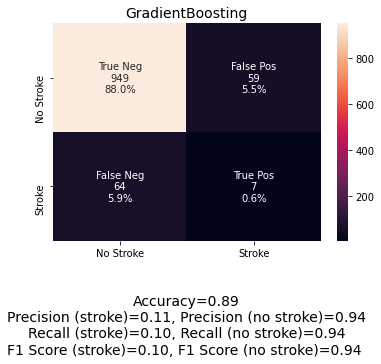

In [17]:
#Create an informative confusion matrix using seaborn
#Define variables for Information inside each box
category = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
percentages = ['{0:.1%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(category, counts, percentages)]
#Convert all of the labels to an array and reshape
labels = np.asarray(labels).reshape(2,2)
#Change the 0,1 to no stroke and stroke for labels
tick_labels = ['No Stroke', 'Stroke']
#Calculate all of the values to be displayed underneath the matrix as xlabel. Calculate precision, recall, F1 for both
#stroke and no stroke
accuracy  = np.trace(confusion_matrix) / float(np.sum(confusion_matrix))
precision_stroke = confusion_matrix[1,1] / sum(confusion_matrix[:,1])
recall_stroke    = confusion_matrix[1,1] / sum(confusion_matrix[1,:])
f1_score_stroke  = 2*precision_stroke*recall_stroke / (precision_stroke + recall_stroke)
precision = confusion_matrix[0,0] / sum(confusion_matrix[:,0])
recall    = confusion_matrix[0,0] / sum(confusion_matrix[0,:])
f1_score  = 2*precision*recall / (precision + recall)
#Set up the text for the x label display underneath the matrix
stats_text = "\n\nAccuracy={:0.2f}\nPrecision (stroke)={:0.2f}, Precision (no stroke)={:0.2f}\nRecall (stroke)={:0.2f}, Recall (no stroke)={:0.2f}\nF1 Score (stroke)={:0.2f}, F1 Score (no stroke)={:0.2f} ".format(accuracy,precision_stroke, precision, recall_stroke, recall, f1_score_stroke, f1_score)
#Make the seaborn heatmap
sns.heatmap(confusion_matrix, annot = labels, fmt = '', xticklabels = tick_labels, yticklabels = tick_labels)
plt.xlabel(stats_text, fontsize = 14)
plt.title("GradientBoosting", fontsize = 14)
